In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
import geopandas as gpd
import shapely

import arcgis
import arcgis.geoanalytics
from arcgis.gis import GIS

from pathlib import Path
from zipfile import ZipFile
import os
%matplotlib inline
pd.options.display.max_columns = None
#https://maps.cityofmadison.com/arcgis/rest/services/Public/OPEN_DATA_ENGR/MapServer/1

In [3]:
streets = gpd.read_file('https://opendata.arcgis.com/datasets/55a0bff60c3b475893c6f483dd53cd40_1.geojson')
sidewalks = gpd.read_file('https://opendata.arcgis.com/datasets/c42127e408f24ec3ae8fd638fb3b9dcd_42.geojson')
citylights = gpd.read_file('https://opendata.arcgis.com/datasets/739a2d9d83e040208cc3e5c75a7ac0bc_28.geojson')#city maintained

In [4]:
busstops = gpd.read_file('https://opendata.arcgis.com/datasets/58d6ef381b594afbb06862dc51480aa1_3.geojson')
utilitylights= gpd.read_file('https://opendata.arcgis.com/datasets/8b8554a589944387a795556ca2cca081_26.geojson')

In [5]:
print(sidewalks.head(4)['geometry'][0])

LINESTRING (-89.05729337252581 42.84742712722363, -89.05734289663351 42.84742657100053, -89.05765751358626 42.84742471939734, -89.0579925160518 42.84742364675677, -89.0580099931537 42.84742370258265, -89.05814510832825 42.84739912729044)


In [40]:
#utility maintained street lights https://data-cityofmadison.opendata.arcgis.com/datasets/utility-maintained-street-lights
#city maintained street lights https://data-cityofmadison.opendata.arcgis.com/datasets/city-maintained-street-lights-luminaire

#transit oriented dev https://data-cityofmadison.opendata.arcgis.com/datasets/transit-oriented-developments
#park and rid https://data-cityofmadison.opendata.arcgis.com/datasets/park-and-ride-locations
#transit stations https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-transfer-stations
#traffic flow https://data-cityofmadison.opendata.arcgis.com/datasets/traffic-flow-map
#walking destinations https://data-cityofmadison.opendata.arcgis.com/datasets/active-living-index-composite-score 
#BRT stops https://data-cityofmadison.opendata.arcgis.com/datasets/bus-rapid-transit-stops
#BRT transit https://data-cityofmadison.opendata.arcgis.com/datasets/bus-rapid-transit-stations
#BRT lines https://data-cityofmadison.opendata.arcgis.com/datasets/bus-rapid-transit-system-lines
#bus route patterns https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-route-patterns
#bus route trips https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-route-trips/data
#bus routes https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-routes/data
#bike paths https://data-cityofmadison.opendata.arcgis.com/datasets/bike-paths
#bus stops https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-stops
#street parking restrictions https://data-cityofmadison.opendata.arcgis.com/datasets/street-parking-restrictions
#pedestrian paths https://data-cityofmadison.opendata.arcgis.com/datasets/pedestrian-paths
#sidewalk https://data-cityofmadison.opendata.arcgis.com/datasets/sidewalk
#curb cut https://data-cityofmadison.opendata.arcgis.com/datasets/curb-cut


#DESTINATIONS
#liscensed establishments https://data-cityofmadison.opendata.arcgis.com/datasets/licensed-establishment/
#polling places https://data-cityofmadison.opendata.arcgis.com/datasets/polling-places
#census track spider workplace https://data-cityofmadison.opendata.arcgis.com/datasets/census-tract-spider-workplace-data
#libraries https://data-cityofmadison.opendata.arcgis.com/datasets/libraries
#mall concourse https://data-cityofmadison.opendata.arcgis.com/datasets/mall-concourse

#GEOGRAPHIC INFO
#greenways and ponds https://data-cityofmadison.opendata.arcgis.com/datasets/greenways-and-ponds
    #https://opendata.arcgis.com/datasets/b14fb0ce0b1b423b9ae466264fac562a_7.geojson
#lakes and rivers https://data-cityofmadison.opendata.arcgis.com/datasets/lakes-and-rivers
    #https://opendata.arcgis.com/datasets/c46082b091a941f8b2ded1dd115a1a05_8.geojson
#parks https://data-cityofmadison.opendata.arcgis.com/datasets/parks 
    #https://data-cityofmadison.opendata.arcgis.com/datasets/parks
    
#some census stuff
#https://madison.apl.wisc.edu/

(43.02, 43.1)

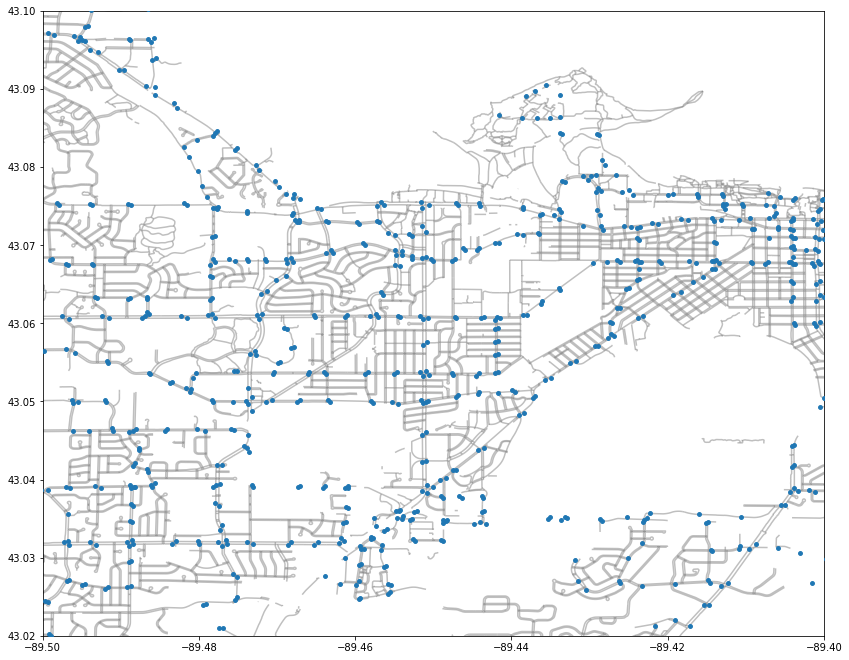

In [5]:
fig, ax = plt.subplots(figsize=(14,12))
markersize = 3
sidewalks.plot(ax=ax,color='grey',alpha=.5)
#citylights.plot(ax=ax, color ='y', markersize = markersize)
#utilitylights.plot(ax=ax, color ='y', markersize = markersize)
busstops.plot(ax=ax, markersize = 5*markersize, zorder=5)
ax.set_xlim(-89.5,-89.4)
ax.set_ylim(43.02,43.1)
#fig.savefig("StopsLightsSidewalks.png", dpi =200, bbox_inches='tight')

(43.02, 43.1)

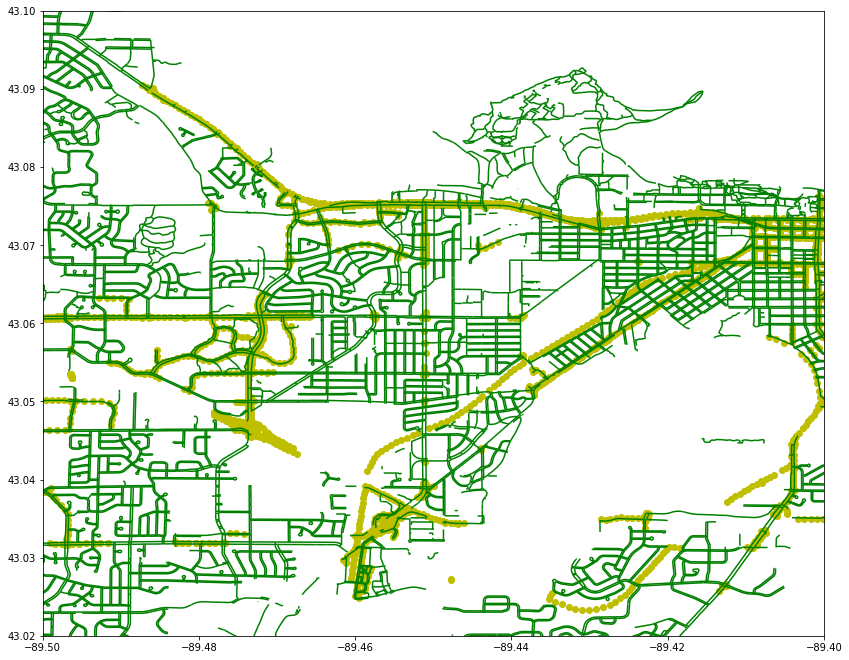

In [12]:
#neighborhood
fig, ax = plt.subplots(figsize=(14,12))
sidewalks.plot(ax=ax,color='grey')
#streets.plot(ax=ax, color='b')
lights.plot(ax=ax, color='y')
ax.set_xlim(-89.5,-89.4)
ax.set_ylim(43.02,43.1)

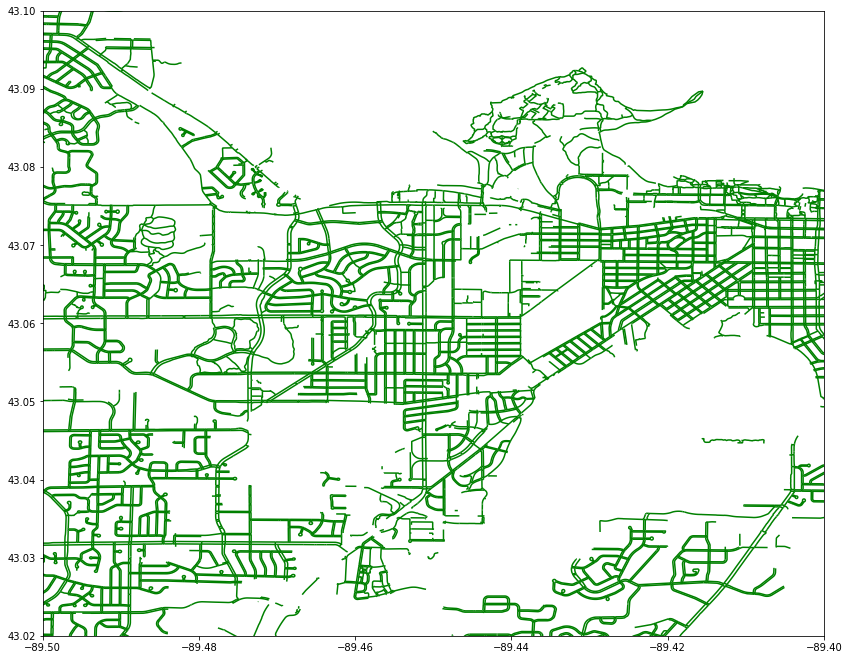

In [10]:
ax.set_xlim(-89.5,-89.4)
ax.set_ylim(43.02,43.1)
fig

In [13]:
citylights

,OBJECTID,Luminaire_ID,Pole_ID,Install_Date,Removal_Date,Circuit_Sub,LED,Wattage,Color,Manufacturer,Fixture_Type,Light_Distribution,Model,LED_Bar,PEC,Lamp_Type,Rotation,Notes,Created_User,Date_Created,Last_Edited_User,Date_Edited,CircuitNumber,geometry
0,1,Luminaire-1,Pole-1577,1970-01-01T00:00:00,1970-01-01T00:00:00,A,None,51.0,None,None,Lumark,SL2,None,2.0,None,2,NaN,None,None,1970-01-01T00:00:00,TNCJS,2020-06-03T12:52:59,11029.0,POINT (-89.53115 43.02480)
1,2,Luminaire-2,Pole-1578,1970-01-01T00:00:00,1970-01-01T00:00:00,T,None,51.0,None,None,Lumark,SL2,None,2.0,None,2,NaN,None,None,1970-01-01T00:00:00,TNCJS,2020-06-03T12:52:59,11029.0,POINT (-89.53157 43.02439)
2,3,Luminaire-3,Pole-1579,1970-01-01T00:00:00,1970-01-01T00:00:00,A,None,51.0,None,None,Lumark,SL2,None,2.0,None,2,NaN,None,None,1970-01-01T00:00:00,TNCJS,2020-06-03T12:52:59,11029.0,POINT (-89.53180 43.02398)
3,4,Luminaire-4,Pole-1580,1970-01-01T00:00:00,1970-01-01T00:00:00,T,None,51.0,None,None,Lumark,SL2,None,2.0,None,2,NaN,None,None,1970-01-01T00:00:00,TNCJS,2020-06-03T12:52:59,11029.0,POINT (-89.53130 43.02362)
4,5,Luminaire-5,Pole-1581,1970-01-01T00:00:00,1970-01-01T00:00:00,A,None,51.0,None,None,Lumark,SL2,None,2.0,None,2,NaN,None,None,1970-01-01T00:00:00,TNCJS,2020-06-03T12:52:59,11029.0,POINT (-89.53065 43.02363)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9526,56398,Luminaire-9772,Pole-54535,2020-05-01T00:00:00,1970-01-01T00:00:00,T,None,75.0,Gray,Cooper,Talon,SL2,None,NaN,No,2,NaN,KD replaced on CW WO 64421,TNCJS,2020-06-10T14:24:03,TNCJS,2020-06-10T14:26:34,9682.0,POINT (-89.53340 43.01922)
9527,56399,Luminaire-9773,Pole-4457,2020-04-24T00:00:00,1970-01-01T00:00:00,A,None,70.0,Gray,Leotek,Cobra,T2,None,NaN,Yes,2,NaN,Replaced HPS with LED on CW WO 64634,TNCJS,2020-06-10T14:58:51,TNCJS,2020-06-10T15:01:02,NaN,POINT (-89.47330 43.04740)
9528,56400,Luminaire-9774,Pole-4486,2020-04-24T00:00:00,1970-01-01T00:00:00,A,None,250.0,Gray,None,Cobra,None,None,NaN,No,1,NaN,Replaced on CW WO 64658,TNCJS,2020-06-10T15:09:07,TNCJS,2020-06-10T15:10:44,NaN,POINT (-89.47382 43.04742)
9529,56402,Luminaire-9776,Pole-1632,2020-06-04T00:00:00,1970-01-01T00:00:00,A1,None,60.0,Black,None,Post Top,None,None,NaN,Yes,2,NaN,Replaced on CW WO 64483,TNCJS,2020-06-10T15:52:47,TNCJS,2020-06-10T15:55:59,4011.0,POINT (-89.45911 43.03034)


In [15]:
type(citylights)

geopandas.geodataframe.GeoDataFrame

In [16]:
type(utilitylights)

geopandas.geodataframe.GeoDataFrame

In [19]:
utilitylights.columns 

Index(['OBJECTID', 'Addr', 'Street1', 'Street2', 'Notes', 'Rotation',
       'Removal_Date', 'Pole_Type', 'Mounting_Height', 'Pole_number',
       'Install_Date', 'Lamp', 'Watt2', 'PEC', 'Base_Type', 'Fixture_Type',
       'Utility', 'LightsID_PK', 'Maintained_By', 'Original_Install_Date',
       'geometry'],
      dtype='object')

In [18]:
citylights.columns

Index(['OBJECTID', 'Luminaire_ID', 'Pole_ID', 'Install_Date', 'Removal_Date',
       'Circuit_Sub', 'LED', 'Wattage', 'Color', 'Manufacturer',
       'Fixture_Type', 'Light_Distribution', 'Model', 'LED_Bar', 'PEC',
       'Lamp_Type', 'Rotation', 'Notes', 'Created_User', 'Date_Created',
       'Last_Edited_User', 'Date_Edited', 'CircuitNumber', 'geometry'],
      dtype='object')